<img src="https://www.globallogic.com/de/wp-content/uploads/sites/26/2019/10/Machine-Learning.jpg">

<br><br>

<H2><B> Análisis de remesas, educación y pobreza; Modelo de Machine Learning para inferir los niveles de pobreza. </B></H2>
<br><br>
<H3><I> Ismael Medina Muñoz </I></H3>

---

# Planteamiento del problema
## Impacto económico de las remesas en la región de la mixteca poblana
La presente investigación busca describir esta región de México con datos estadísticos publicados por BANXICO asociados a remesas, CONEVAL con datos asociados a la pobreza e INEGI con datos asociados a la educación.
Nos enfocaremos en analizar datos de las 32 entidades federativas de México.

## Hipótesis de investigación
El crecimiento del país tiene gran potencial de desarrollo si se promueve un mejor plan financiero para los habitantes beneficiados por las remesas. La hipótesis es que las remesas en algunos estados son comparables con las de otros estados con mayor desarrollo económico y esto sería antecedente para la creación de planes financieros y un incremento en la educación financiera.

# Análisis de datos y reporte estadístico
En la presente investigación se muestra la construcción de las variables que, se teoriza, serían útiles para identificar el impacto de las remesas en la pobreza y educación de una región. Reducir la pobreza define esta variable como objetivo. Las variables predictoras son entonces las remesas y la educación.

## Los indicadores de educación
En el análisis se consideró el nivel educativo y la existencia de su relación con la pobreza. Tomé el conjunto de datos `Grado promedio de escolaridad de la población de 15 y más años por entidad federativa según sexo, años censales seleccionados 2000 a 2020` como punto de inicio del análisis. 
Del archivo en plano original creé una copia que fue manipulada de forma manual para una carga más adecuada en un pandas DataFrame.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
escolaridad_path = "C:\\Users\\ismedina\\Documents\\Maestría\\2022-1\\ModelosAvanzados\\01EleccionTema\\GradoPromedioEscolaridad20220205.xlsx"

escolaridad_completo = pd.read_excel(escolaridad_path, sheet_name = 'TabuladoLimpio', header = 0, index_col=0)

In [3]:
escolaridad_completo.head()

,Total2010,Hombres2010,Mujeres2010,Total2015,Hombres2015,Mujeres2015,Total2020,Hombres2020,Mujeres2020
Entidad federativa,,,,,,,,,
Estados Unidos Mexicanos,8.63,8.79,8.48,9.16,9.33,9.01,9.74,9.84,9.64
Aguascalientes,9.23,9.30,9.17,9.73,9.82,9.64,10.35,10.38,10.32
Baja California,9.26,9.33,9.20,9.76,9.84,9.68,10.20,10.22,10.18
Baja California Sur,9.40,9.37,9.42,9.91,9.92,9.89,10.34,10.28,10.40
Campeche,8.51,8.71,8.32,9.14,9.35,8.94,9.63,9.74,9.52


Al análisis no pretende distinguir entre el sexo dado que el interés es la región. Es por esto que decidí tomar los totales, inicié por describir estadísticamente los datos año contra año. Para mejor comparación eliminé el registro de `Estados Unidos Mexicanos` que agrega los datos como un total.

In [4]:
escolaridad_completo = escolaridad_completo[
    escolaridad_completo.index != 'Estados Unidos Mexicanos']

escolaridad_completo[['Total2010', 'Total2015', 'Total2020']].describe()

,Total2010,Total2015,Total2020
count,32.000000,32.000000,32.000000
mean,8.599062,9.145625,9.722187
std,0.847674,0.821026,0.787535
min,6.670000,7.290000,7.780000
25%,8.062500,8.697500,9.340000
50%,8.780000,9.285000,9.835000
75%,9.120000,9.590000,10.225000
max,10.540000,11.120000,11.480000


El mismo análisis estadístico se hizo de forma gráfica con comparación de distribuciones.

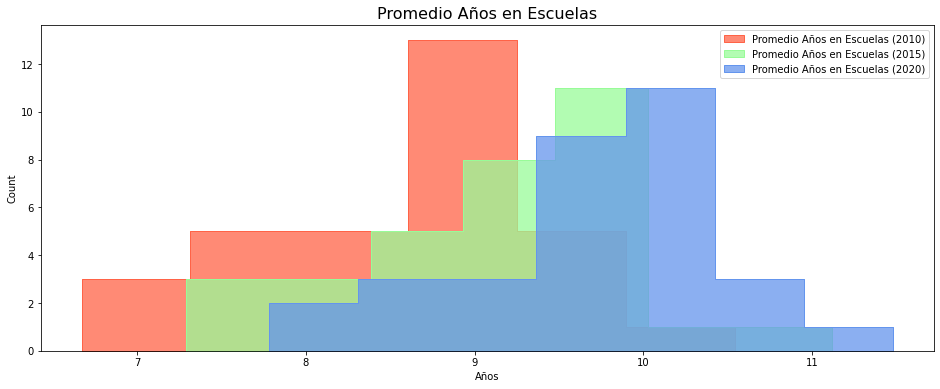

In [5]:
plt.figure(figsize=(16,6))

myplt = sns.histplot(data=escolaridad_completo, 
             x = 'Total2010', label="Promedio Años en Escuelas (2010)", kde=False
            , color = 'tomato', element="step")

sns.histplot(data=escolaridad_completo, 
             x = 'Total2015', label="Promedio Años en Escuelas (2015)", kde=False
            , color = 'palegreen', element="step")

sns.histplot(data=escolaridad_completo, 
             x = 'Total2020', label="Promedio Años en Escuelas (2020)", kde=False
            , color = 'cornflowerblue', element="step")

plt.title("Promedio Años en Escuelas", fontsize = 16)
plt.xlabel("Años")


plt.legend()

Las distribuciones son muy similares entre ellas. Hice entonces un análisis para comprobar la diferencia de las distribuciones de promedio de años en escuelas en los años 2010, 2015 y 2020.

### Pruebas de diferencias de medias
Surgió la duda de si el total de 2010, el total de 2015 y el total de 2020 son diferentes. Para comprobar esto, hice un análisis de diferencias medias pareadas. Aquí recapitulo el análisis de diferencias de medias pareadas desde la lectura de Rice (2007) asumiendo que los datos siguen una distribución normal.

Sean 

$$E(D_i) = \mu_X -\mu_Y = \mu_D$$
$$Var(D_i) = \sigma_D^2$$

Y sea $\sigma$ aparentemente desconocido, entonces podemos usar el estadístico $t$ con $n-1$ grados de libertad. El estadístico $t$ se define como:

$$t_{score} = \frac { \bar{D} - \mu_D } { S_{ \bar{D} } } $$

En este escenario, definiremos que nuestra muestra $X$ es la muestra de los datos de 2020 y la muestra $Y$ es de los datos 2015. De esta forma podemos establecer la hipótesis siguiente:

$$ H_0: \mu_D = 0 $$
$$ H_A: \mu_D \ne 0 $$

Se procedió a hacer las pruebas de 2 colas para comprobar la hipótesis.

In [6]:
from scipy.stats import t

D_bar = np.mean(escolaridad_completo.Total2020 - escolaridad_completo.Total2015)
S_D_bar = np.std(escolaridad_completo.Total2020 - escolaridad_completo.Total2015)
mu_D = 0

t_score = (D_bar - mu_D) / S_D_bar

alpha = 0.05
df = len(escolaridad_completo.index)

cdf = 2 * (1 - t.cdf(t_score, df = df)) ## 2 colas
print("Pr( T <=", t_score, ") = ", cdf)

if (cdf < alpha):
    print("Rechazamos H_0")
else:
    print("Rechazamos H_A")

Pr( T <= 4.8743557707568765 ) =  2.8621625130842432e-05
Rechazamos H_0


Se verificó la condición para la muestra $X$ de los datos de 2015 y la muestra $Y$ es de los datos de 2010. La hipótesis es la siguiente:

$$ H_0: \mu_D = 0 $$
$$ H_A: \mu_D \ne 0 $$

In [7]:
from scipy.stats import t

D_bar = np.mean(escolaridad_completo.Total2015 - escolaridad_completo.Total2010)
S_D_bar = np.std(escolaridad_completo.Total2015 - escolaridad_completo.Total2010)
mu_D = 0

t_score = (D_bar - mu_D) / S_D_bar

alpha = 0.05
df = len(escolaridad_completo.index)

cdf = 2 * (1 - t.cdf(t_score, df = df)) ## 2 colas
print("Pr( T <=", t_score, ") = ", cdf)

if (cdf < alpha):
    print("Rechazamos H_0")
else:
    print("Rechazamos H_A")

Pr( T <= 6.833334729486723 ) =  9.959339841714154e-08
Rechazamos H_0


Sabemos entonces que cada una de estas variables muestra diferencias en los periodos, sin embargo, hay correlación entre ellas y esto nos indicó que debemos usar sólo una para nuestro análisis. En este punto no identifiqué cual es la mejor variable, por ello almacené ambas para su posterior análisis.

In [8]:
escolaridad_completo['Delta2010a2015'] = escolaridad_completo.Total2015 - escolaridad_completo.Total2010
escolaridad_completo['Delta2015a2020'] = escolaridad_completo.Total2020 - escolaridad_completo.Total2015

## Otras métricas de educación
Otros datos que obtuve tienen que ver con la cantidad de alumnos por maestros y por escuelas. De momento no parece útil tener estas variables en el conjunto de datos final, pero incluyo su análisis dado el tiempo invertido en su revisión. Del archivo en plano original creé una copia que manipulé de forma manual para una carga más adecuada en un pandas DataFrame.

In [9]:
detalle_escolaridad_path = "C:\\Users\\ismedina\\Documents\\Maestría\\2022-1\\ModelosAvanzados\\01EleccionTema\\RelacionAlumnosMaestro20220205.xlsx"

detalle_escolaridad_completo = pd.read_excel(detalle_escolaridad_path, sheet_name = 'TabuladoLimpio', header = 0, index_col=0)

In [10]:
detalle_escolaridad_completo.head(10)

,Nivel educativo,AlumnosMaestros_2010a2011,AlumnosEscuelas_2010a2011,AlumnosMaestros_2015a2016,AlumnosEscuelas_2015a2016,AlumnosMaestros_2020a2021,AlumnosEscuelas_2020a2021
Entidad federativa,,,,,,,
Estados Unidos Mexicanos,Total,19,133,17,137,17,133
Estados Unidos Mexicanos,Preescolar,21,51,21,54,19,49
Estados Unidos Mexicanos,Primaria,26,150,25,145,24,143
Estados Unidos Mexicanos,Secundaria,16,171,17,176,16,158
Estados Unidos Mexicanos,Media superior,15,277,12,245,12,238
Estados Unidos Mexicanos,Superior,9,474,9,683,10,696
Aguascalientes,Total,17,180,16,189,16,187
Aguascalientes,Preescolar,23,72,24,80,24,78
Aguascalientes,Primaria,30,213,31,223,32,225


Del conjunto de datos pareció razonable que al tener un mayor nivel educativo también hay un menor índice de pobreza. Mi suposición es que estados con menos rezago educativo y menor pobreza tienen alguna relación con los niveles de remesas. Esto puede traducirse en que a mayor cantidad de personas con un nivel educativo superior tendremos menos pobreza.

In [11]:
detalle_escolaridad_completo = detalle_escolaridad_completo[
    detalle_escolaridad_completo.index != 'Estados Unidos Mexicanos']

sorted_detalle_escolaridad = detalle_escolaridad_completo[
    detalle_escolaridad_completo['Nivel educativo'] == 
    'Superior'].sort_values(by = 'AlumnosMaestros_2010a2011')

In [12]:
sorted_detalle_escolaridad[['AlumnosMaestros_2010a2011', 
                             'AlumnosMaestros_2015a2016', 
                             'AlumnosMaestros_2020a2021']].describe()

,AlumnosMaestros_2010a2011,AlumnosMaestros_2015a2016,AlumnosMaestros_2020a2021
count,32.000000,32.000000,32.000000
mean,9.687500,9.718750,10.625000
std,1.595103,1.486159,1.844783
min,7.000000,7.000000,7.000000
25%,8.000000,8.750000,9.000000
50%,10.000000,10.000000,10.000000
75%,11.000000,10.250000,12.000000
max,13.000000,14.000000,15.000000


El mismo análisis estadístico se hizo de forma gráfica con comparación de distribuciones de la relación alumnos-maestros en los años 2010, 2015 y 2020.

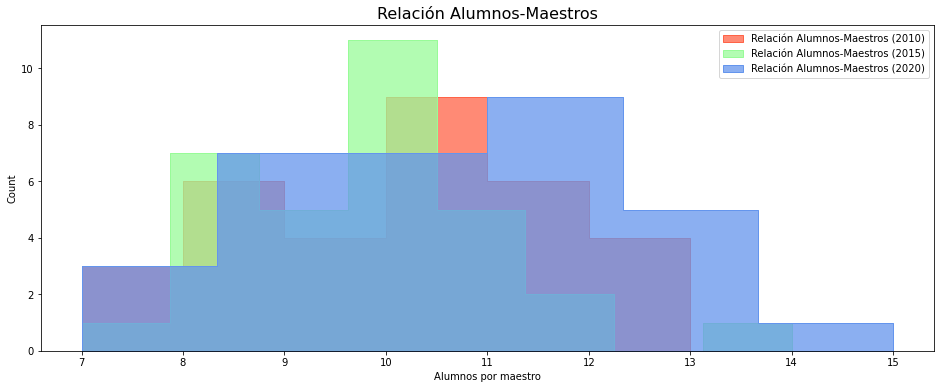

In [13]:
plt.figure(figsize=(16,6))

myplt = sns.histplot(data=sorted_detalle_escolaridad 
            , x= 'AlumnosMaestros_2010a2011', label="Relación Alumnos-Maestros (2010)", kde=False
            , color = 'tomato', element="step")

sns.histplot(data=sorted_detalle_escolaridad, 
             x = 'AlumnosMaestros_2015a2016', label="Relación Alumnos-Maestros (2015)", kde=False
            , color = 'palegreen', element="step")

sns.histplot(data=sorted_detalle_escolaridad, 
             x = 'AlumnosMaestros_2020a2021', label="Relación Alumnos-Maestros (2020)", kde=False
            , color = 'cornflowerblue', element="step")

plt.title("Relación Alumnos-Maestros", fontsize = 16)
plt.xlabel("Alumnos por maestro")

plt.legend()

Otra variable es la cantidad de alumnos por escuela en los años 2010, 2015 y 2020.

In [14]:
sorted_detalle_escolaridad[['AlumnosEscuelas_2010a2011', 
                             'AlumnosEscuelas_2015a2016', 
                             'AlumnosEscuelas_2020a2021']].describe()

,AlumnosEscuelas_2010a2011,AlumnosEscuelas_2015a2016,AlumnosEscuelas_2020a2021
count,32.000000,32.000000,32.00000
mean,451.343750,660.156250,657.68750
std,122.978259,190.024974,181.98962
min,248.000000,379.000000,350.00000
25%,350.750000,508.750000,521.25000
50%,434.500000,644.000000,654.50000
75%,548.500000,798.000000,768.25000
max,739.000000,1152.000000,1110.00000


El mismo análisis estadístico se hizo de forma gráfica con comparación de distribuciones de la relación alumnos-escuelas en los años 2010, 2015 y 2020.

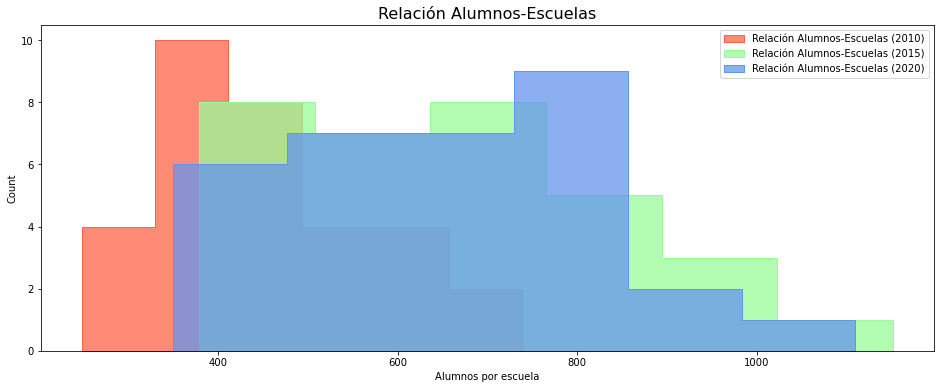

In [15]:
plt.figure(figsize=(16,6))

myplt = sns.histplot(data=sorted_detalle_escolaridad 
            , x= 'AlumnosEscuelas_2010a2011', label="Relación Alumnos-Escuelas (2010)", kde=False
            , color = 'tomato', element="step")

sns.histplot(data=sorted_detalle_escolaridad, 
             x = 'AlumnosEscuelas_2015a2016', label="Relación Alumnos-Escuelas (2015)", kde=False
            , color = 'palegreen', element="step")

sns.histplot(data=sorted_detalle_escolaridad, 
             x = 'AlumnosEscuelas_2020a2021', label="Relación Alumnos-Escuelas (2020)", kde=False
            , color = 'cornflowerblue', element="step")

plt.title("Relación Alumnos-Escuelas", fontsize = 16)
plt.xlabel("Alumnos por escuela")

plt.legend()

## Los indicadores de pobreza
Obtuve datos de los indicadores de pobreza que coinciden en algunos periodos de tiempo con el análisis de los indicadores de educación. Del archivo en plano original creé una copia que fue manipulada de forma manual para una carga más adecuada en un pandas DataFrame.

In [16]:
pobreza_path = "C:\\Users\\ismedina\\Documents\\Maestría\\2022-1\\ModelosAvanzados\\01EleccionTema\\EvolucionPobreza2016a2020.xlsx"

pobreza_completo = pd.read_excel(pobreza_path, sheet_name = 'TabuladoLimpio', header = 0, index_col=0)

pobreza_completo.index.name = 'Entidad federativa'

Para mejor comparación eliminé el registro de `Estados Unidos Mexicanos`. Este total no es útil.

In [17]:
pobreza_completo = pobreza_completo[
    pobreza_completo.index != 'Estados Unidos Mexicanos']

pobreza_completo.head()

,PobrezaPorcentaje2016,PobrezaPorcentaje2018,PobrezaPorcentaje2020,PobrezaMiles2016,PobrezaMiles2018,PobrezaMiles2020,PobrezaModeradaPorcentajes2016,PobrezaModeradaPorcentajes2018,PobrezaModeradaPorcentajes2020,PobrezaModeradaMiles2016,PobrezaModeradaMiles2018,PobrezaModeradaMiles2020,PobrezaExtremaPorcentaje2016,PobrezaExtremaPorcentaje2018,PobrezaExtremaPorcentaje2020,PobrezaExtremaMiles2016,PobrezaExtremaMiles2018,PobrezaExtremaMiles2020
Entidad federativa,,,,,,,,,,,,,,,,,,
Aguascalientes,28.946480,26.265408,27.626693,381.380,360.841,396.461,26.729916,25.277146,25.209799,352.176,347.264,361.777,2.216564,0.988262,2.416894,29.204,13.577,34.684
Baja California,22.604867,23.598687,22.510117,819.473,884.189,851.700,21.643846,22.247364,20.976987,784.634,833.558,793.692,0.961021,1.351323,1.533130,34.839,50.631,58.008
Baja California Sur,22.880050,18.572164,27.602224,165.234,141.365,223.432,21.392876,17.404613,24.706506,154.494,132.478,199.992,1.487174,1.167551,2.895718,10.740,8.887,23.440
Campeche,45.660192,48.964296,50.549147,391.464,430.853,472.448,39.112163,39.489143,38.503966,335.325,347.478,359.870,6.548029,9.475153,12.045181,56.139,83.375,112.578
Coahuila de Zaragoza,27.055713,25.507705,25.617041,799.762,778.060,812.145,25.130600,23.977689,23.062671,742.856,731.390,731.163,1.925113,1.530016,2.554371,56.906,46.670,80.982


Hice el análisis estadístico de los datos. El conjunto de datos tiene información de 2016, 2018 y 2020. Sólo seleccioné las columnas asociadas a los periodos de 2016 y de 2020.

In [18]:
columnas = ['PobrezaPorcentaje2016', 'PobrezaPorcentaje2020', 
           'PobrezaModeradaPorcentajes2016', 'PobrezaModeradaPorcentajes2020',
           'PobrezaExtremaPorcentaje2016', 'PobrezaExtremaPorcentaje2020']

pobreza_completo[columnas].describe()

,PobrezaPorcentaje2016,PobrezaPorcentaje2020,PobrezaModeradaPorcentajes2016,PobrezaModeradaPorcentajes2020,PobrezaExtremaPorcentaje2016,PobrezaExtremaPorcentaje2020
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,41.785711,42.167871,35.080861,34.245333,6.704851,7.922538
std,15.077506,14.337060,9.609355,8.643851,7.043524,6.855525
min,18.840340,22.510117,17.577544,20.976987,0.961021,1.533130
25%,30.265553,29.460866,27.068255,26.192313,2.200399,2.928869
50%,38.727721,42.794270,35.079077,35.631007,4.400381,4.436733
75%,53.923337,50.799542,43.636345,40.930206,7.802475,10.773961
max,77.912765,75.491290,50.168239,49.688946,29.635348,29.049793


Hice el mismo análisis estadístico de forma gráfica con la comparación de distribuciones de pobreza, pobreza moderada y pobreza extrema para los años 2016 y 2020.

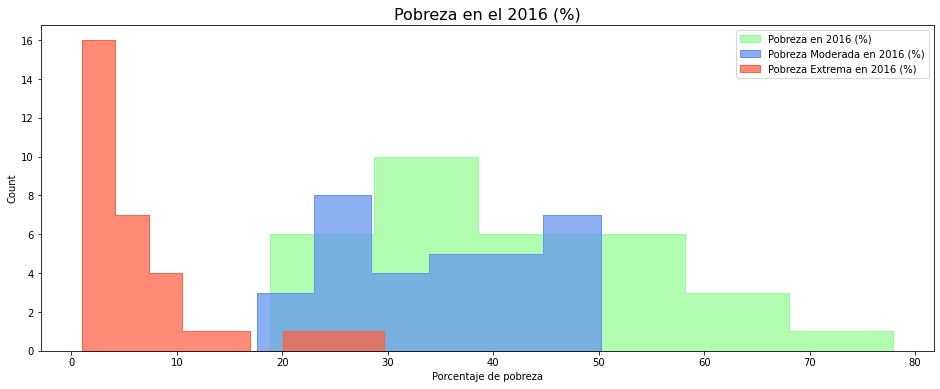

In [19]:
plt.figure(figsize=(16,6))

myplt = sns.histplot(data=pobreza_completo 
            , x= 'PobrezaPorcentaje2016', label="Pobreza en 2016 (%)", kde=False
            , color = 'palegreen', element="step")

sns.histplot(data=pobreza_completo, 
             x = 'PobrezaModeradaPorcentajes2016', label="Pobreza Moderada en 2016 (%)", kde=False
            , color = 'cornflowerblue', element="step")

sns.histplot(data=pobreza_completo, 
             x = 'PobrezaExtremaPorcentaje2016', label="Pobreza Extrema en 2016 (%)", kde=False
            , color = 'tomato', element="step")

plt.title("Pobreza en el 2016 (%)", fontsize = 16)
plt.xlabel("Porcentaje de pobreza")

plt.legend()

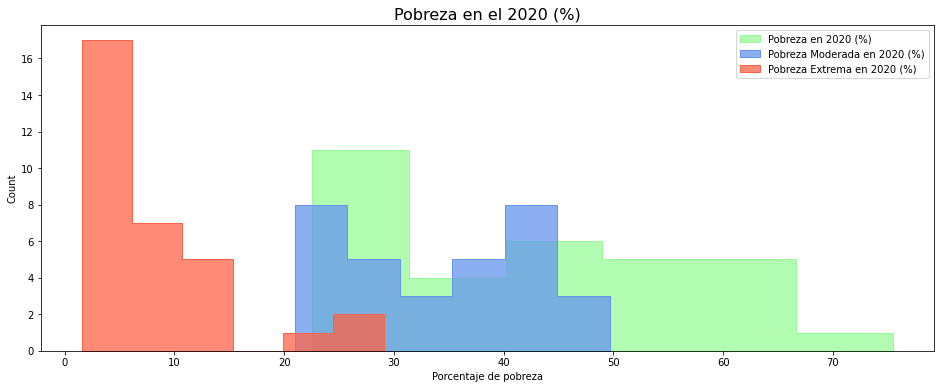

In [20]:
plt.figure(figsize=(16,6))

myplt = sns.histplot(data=pobreza_completo 
            , x= 'PobrezaPorcentaje2020', label="Pobreza en 2020 (%)", kde=False
            , color = 'palegreen', element="step")

sns.histplot(data=pobreza_completo, 
             x = 'PobrezaModeradaPorcentajes2020', label="Pobreza Moderada en 2020 (%)", kde=False
            , color = 'cornflowerblue', element="step")

sns.histplot(data=pobreza_completo, 
             x = 'PobrezaExtremaPorcentaje2020', label="Pobreza Extrema en 2020 (%)", kde=False
            , color = 'tomato', element="step")

plt.title("Pobreza en el 2020 (%)", fontsize = 16)
plt.xlabel("Porcentaje de pobreza")

plt.legend()

## Análisis de la pobreza y su relación con la escolaridad
Otro análisis que conduje fue la pobreza y su relación con la escolaridad. Esto fue posible con los conjuntos de datos creados anteriormente. Combiné ambos conjuntos de datos para la comparación posterior.

In [21]:
left = pobreza_completo[['PobrezaPorcentaje2016', 'PobrezaModeradaPorcentajes2016', 
                         'PobrezaExtremaPorcentaje2016',
                         'PobrezaPorcentaje2020', 'PobrezaModeradaPorcentajes2020',
                         'PobrezaExtremaPorcentaje2020']]
right = escolaridad_completo[['Total2015', 
                             'Total2020']]

right.columns = ['EscolaridadTotal2015', 'EscolaridadTotal2020']

df_joined = left.join(right)

In [22]:
df_joined.head()

,PobrezaPorcentaje2016,PobrezaModeradaPorcentajes2016,PobrezaExtremaPorcentaje2016,PobrezaPorcentaje2020,PobrezaModeradaPorcentajes2020,PobrezaExtremaPorcentaje2020,EscolaridadTotal2015,EscolaridadTotal2020
Entidad federativa,,,,,,,,
Aguascalientes,28.946480,26.729916,2.216564,27.626693,25.209799,2.416894,9.73,10.35
Baja California,22.604867,21.643846,0.961021,22.510117,20.976987,1.533130,9.76,10.20
Baja California Sur,22.880050,21.392876,1.487174,27.602224,24.706506,2.895718,9.91,10.34
Campeche,45.660192,39.112163,6.548029,50.549147,38.503966,12.045181,9.14,9.63
Coahuila de Zaragoza,27.055713,25.130600,1.925113,25.617041,23.062671,2.554371,9.90,10.43


Habiendo combinado los dataframes, creé una serie de `jointplots` que permite visualizar la relación de la educación con la pobreza, pobreza moderada y pobreza extrema en los años 2015-2016 y 2020-2021. Elegí este tipo de gráficas dado que se obtiene mejor información visual que con `scatterplots` para este caso.

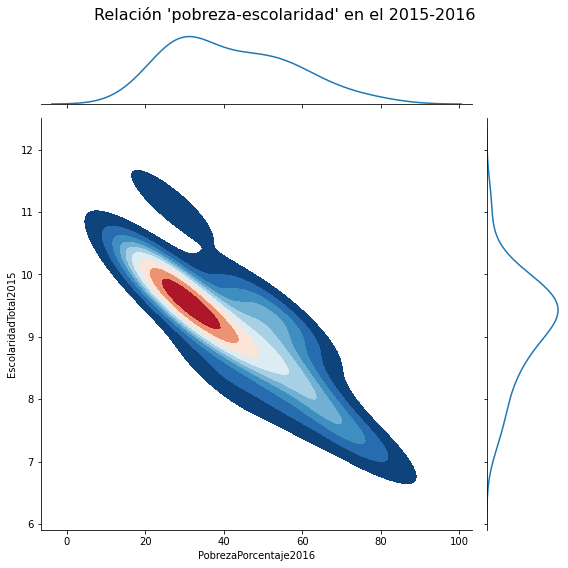

In [23]:
p = sns.jointplot(x=df_joined['PobrezaPorcentaje2016'],
                  y=df_joined['EscolaridadTotal2015'], 
                  kind="kde", height = 8, shade = True,
                  cmap="RdBu_r")

p.fig.suptitle("Relación 'pobreza-escolaridad' en el 2015-2016", fontsize = 16)
p.fig.tight_layout()

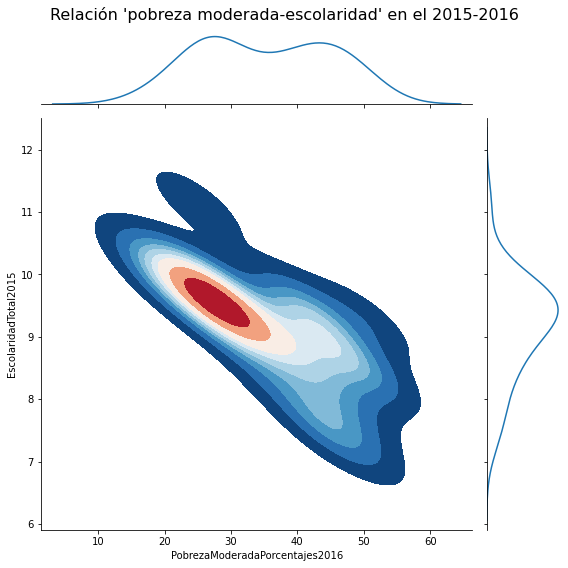

In [24]:
p = sns.jointplot(x=df_joined['PobrezaModeradaPorcentajes2016'],
                  y=df_joined['EscolaridadTotal2015'], 
                  kind="kde", height = 8, shade = True,
                  cmap="RdBu_r")

p.fig.suptitle("Relación 'pobreza moderada-escolaridad' en el 2015-2016", fontsize = 16)
p.fig.tight_layout()

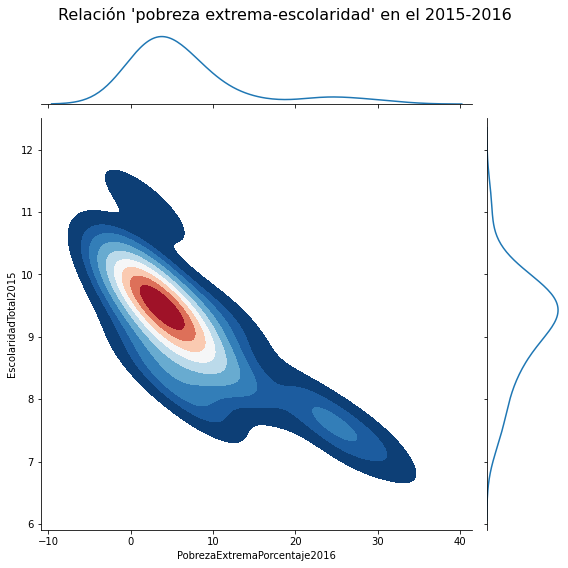

In [25]:
p = sns.jointplot(x=df_joined['PobrezaExtremaPorcentaje2016'],
                  y=df_joined['EscolaridadTotal2015'], 
                  kind="kde", height = 8, shade = True,
                  cmap="RdBu_r")

p.fig.suptitle("Relación 'pobreza extrema-escolaridad' en el 2015-2016", fontsize = 16)
p.fig.tight_layout()

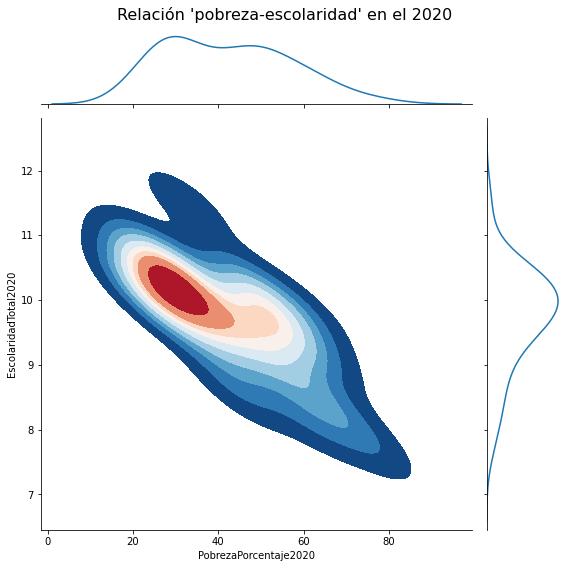

In [26]:
p = sns.jointplot(x=df_joined['PobrezaPorcentaje2020'],
                  y=df_joined['EscolaridadTotal2020'], 
                  kind="kde", height = 8, shade = True,
                  cmap="RdBu_r")

p.fig.suptitle("Relación 'pobreza-escolaridad' en el 2020", fontsize = 16)
p.fig.tight_layout()

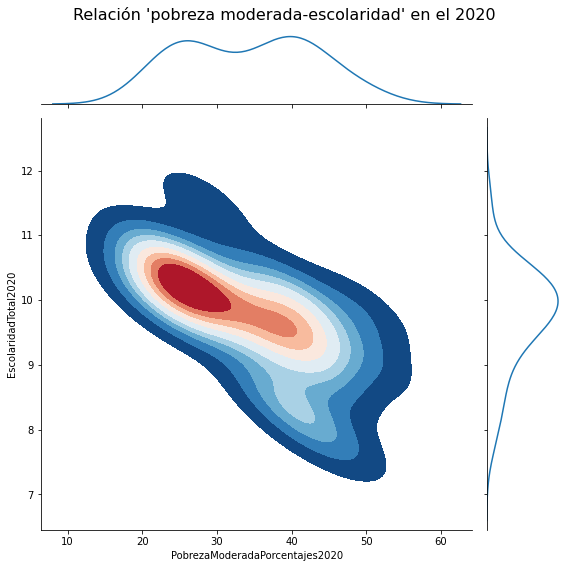

In [27]:
p = sns.jointplot(x=df_joined['PobrezaModeradaPorcentajes2020'],
                  y=df_joined['EscolaridadTotal2020'], 
                  kind="kde", height = 8, shade = True,
                  cmap="RdBu_r")

p.fig.suptitle("Relación 'pobreza moderada-escolaridad' en el 2020", fontsize = 16)
p.fig.tight_layout()

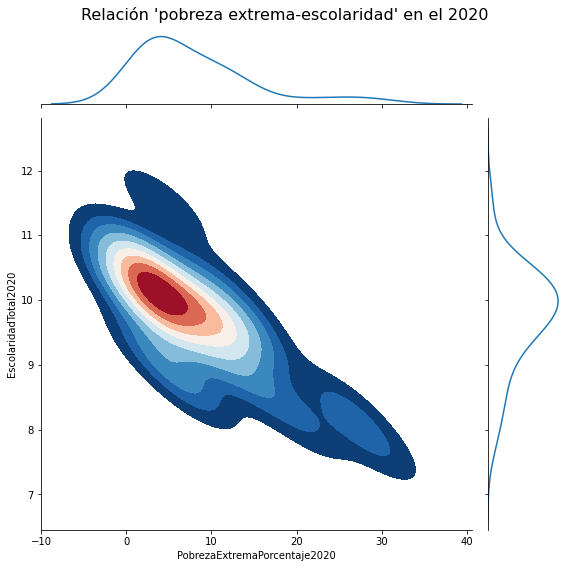

In [28]:
p = sns.jointplot(x=df_joined['PobrezaExtremaPorcentaje2020'],
                  y=df_joined['EscolaridadTotal2020'], 
                  kind="kde", height = 8, shade = True,
                  cmap="RdBu_r")

p.fig.suptitle("Relación 'pobreza extrema-escolaridad' en el 2020", fontsize = 16)
p.fig.tight_layout()

Se observa una clara relación lineal entre la pobreza, pobreza moderada y pobreza extrema con el grado de estudio que se mantiene en 2015-2016 así como en 2020.

## Los indicadores de remesas
Obtuve datos de las remesas que llegan al país. Lo que quise encontrar es la explicación del impacto de las remesas en los índices de pobreza o en los niveles educativos.

In [29]:
remesas_path = "C:\\Users\\ismedina\\Documents\\Maestría\\2022-1\\ModelosAvanzados\\01EleccionTema\\RemesasPorEntidadFederativa20220205.xlsx"

remesas_completo = pd.read_excel(remesas_path, sheet_name = 'RemesasLimpioT', header = 0, index_col=0)

remesas_completo.index.name = 'Entidad federativa'

In [30]:
remesas_completo.head()

,2010-01-01,2010-01-04,2010-01-07,2010-01-10,2011-01-01,2011-01-04,2011-01-07,2011-01-10,2015-01-01,2015-01-04,...,2016-01-07,2016-01-10,2020-01-01,2020-01-04,2020-01-07,2020-01-10,2021-01-01,2021-01-04,2021-01-07,2021-01-10
Entidad federativa,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,67.4965,79.1047,75.6273,71.6935,69.0867,79.4070,81.4962,76.3324,80.5570,88.2038,...,103.6670,102.2457,127.7942,135.2717,134.8497,141.9874,140.3132,177.7184,184.1871,194.4407
Baja California,77.0840,91.6085,92.4289,86.8352,89.2406,101.6637,107.1542,98.6943,152.9863,173.9016,...,177.0723,169.5472,264.1163,334.7347,332.6868,303.3563,301.1542,360.3484,372.2098,364.6711
Baja California Sur,8.6622,8.5464,8.2586,8.2783,8.1083,9.3589,9.9774,9.2063,11.5517,12.9243,...,14.8680,13.3286,22.2964,24.9397,34.8488,29.4685,29.3230,34.4999,34.8623,35.1321
Campeche,13.0847,14.7972,14.3003,12.8732,12.8965,15.5239,15.8585,13.5367,12.8828,14.9061,...,17.1889,16.9547,23.9140,25.4014,35.3475,30.5550,29.3031,37.3885,40.3355,40.4757
Coahuila,58.0532,60.9197,59.2913,55.7454,55.2152,64.9791,64.8179,61.9570,92.0097,112.7057,...,108.0361,111.9405,160.5944,183.2390,182.5131,184.8591,183.5633,228.9021,244.2344,247.6623


Unir los conjuntos de datos requirió que se renombraran los índices para homologarlo con los dataframes previos. Eliminé el registro del total para un mejor análisis estadístico.

In [31]:
remesas_completo = remesas_completo.rename(index = {'Coahuila' : 'Coahuila de Zaragoza',
                                 'Estado de México' : 'México',
                                 'Michoacán' : 'Michoacán de Ocampo',
                                 'Veracruz' : 'Veracruz de Ignacio de la Llave'} )

remesas_completo = remesas_completo[
    remesas_completo.index != 'Total']

remesas_completo.head()

,2010-01-01,2010-01-04,2010-01-07,2010-01-10,2011-01-01,2011-01-04,2011-01-07,2011-01-10,2015-01-01,2015-01-04,...,2016-01-07,2016-01-10,2020-01-01,2020-01-04,2020-01-07,2020-01-10,2021-01-01,2021-01-04,2021-01-07,2021-01-10
Entidad federativa,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,67.4965,79.1047,75.6273,71.6935,69.0867,79.4070,81.4962,76.3324,80.5570,88.2038,...,103.6670,102.2457,127.7942,135.2717,134.8497,141.9874,140.3132,177.7184,184.1871,194.4407
Baja California,77.0840,91.6085,92.4289,86.8352,89.2406,101.6637,107.1542,98.6943,152.9863,173.9016,...,177.0723,169.5472,264.1163,334.7347,332.6868,303.3563,301.1542,360.3484,372.2098,364.6711
Baja California Sur,8.6622,8.5464,8.2586,8.2783,8.1083,9.3589,9.9774,9.2063,11.5517,12.9243,...,14.8680,13.3286,22.2964,24.9397,34.8488,29.4685,29.3230,34.4999,34.8623,35.1321
Campeche,13.0847,14.7972,14.3003,12.8732,12.8965,15.5239,15.8585,13.5367,12.8828,14.9061,...,17.1889,16.9547,23.9140,25.4014,35.3475,30.5550,29.3031,37.3885,40.3355,40.4757
Coahuila de Zaragoza,58.0532,60.9197,59.2913,55.7454,55.2152,64.9791,64.8179,61.9570,92.0097,112.7057,...,108.0361,111.9405,160.5944,183.2390,182.5131,184.8591,183.5633,228.9021,244.2344,247.6623


Dado que los datos están descritos por trimestres, hice la sumarización anual para crear las variables que concentran dicha sumatoria para los años 2015 a 2016 y de 2020 a 2021.

In [32]:
remesas_general = pd.DataFrame()

remesas_general['Remesas_2015a2016'] = remesas_completo.loc[:, ['2015-01-01', '2015-01-04', '2015-01-07', '2015-01-10',
               '2016-01-01', '2016-01-04', '2016-01-07', '2016-01-10']].sum(axis = 1)

remesas_general['Remesas_2020a2021'] = remesas_completo.loc[:, ['2020-01-01', '2020-01-04', '2020-01-07', '2020-01-10',
               '2021-01-01', '2021-01-04', '2021-01-07', '2021-01-10']].sum(axis = 1)

In [33]:
remesas_general.describe()

,Remesas_2015a2016,Remesas_2020a2021
count,32.000000,32.000000
mean,1618.064200,2881.202925
std,1334.513348,2373.605070
min,106.582200,245.370700
25%,795.197950,1454.391650
50%,1251.004550,2260.533300
75%,2259.734775,3739.457800
max,5233.048200,9389.331000


Hice el mismo análisis estadístico de forma gráfica con comparación de distribuciones de remesas de los años 2015-2016 y 2020-2021.

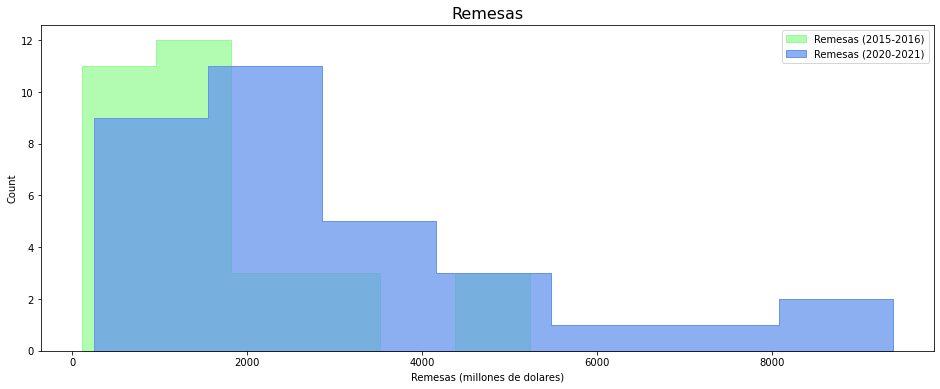

In [34]:
plt.figure(figsize=(16,6))

myplt = sns.histplot(data=remesas_general 
            , x= 'Remesas_2015a2016', label="Remesas (2015-2016)", kde=False
            , color = 'palegreen', element="step")

sns.histplot(data=remesas_general, 
             x = 'Remesas_2020a2021', label="Remesas (2020-2021)", kde=False
            , color = 'cornflowerblue', element="step")

plt.title("Remesas", fontsize = 16)
plt.xlabel("Remesas (millones de dolares)")

plt.legend()

Es notorio el cambio de comportamiento en las remesas entre 2020 y 2021 respecto de las cifras de 2015-2016. Ya con los datos de los dataframes anteriores creé un sólo dataframe donde analicé la relación de las variables del año 2020-2021.

## Análisis de la pobreza, escolaridad  y su relación con las remesas
Aquí inicié con una correlación de las variables a fin de identificar algún tipo de modelo que describa a los datos. El primer paso fue crear el conjunto de datos con las variables de pobreza, escolaridad y remesas del año 2020-2021.

In [35]:
left = pobreza_completo[['PobrezaPorcentaje2020', 'PobrezaModeradaPorcentajes2020',
                         'PobrezaExtremaPorcentaje2020']]
right = escolaridad_completo[['Total2020']]

right.columns = ['EscolaridadTotal2020']

df_joined = left.join(right)

df_joined = df_joined.join(remesas_general['Remesas_2020a2021'])

In [36]:
df_joined.head()

,PobrezaPorcentaje2020,PobrezaModeradaPorcentajes2020,PobrezaExtremaPorcentaje2020,EscolaridadTotal2020,Remesas_2020a2021
Entidad federativa,,,,,
Aguascalientes,27.626693,25.209799,2.416894,10.35,1236.5624
Baja California,22.510117,20.976987,1.533130,10.20,2633.2776
Baja California Sur,27.602224,24.706506,2.895718,10.34,245.3707
Campeche,50.549147,38.503966,12.045181,9.63,262.7207
Coahuila de Zaragoza,25.617041,23.062671,2.554371,10.43,1615.5677


Aquí se presenta la matríz de correlación y su gráfica asociada.

In [37]:
df_joined.corr()

,PobrezaPorcentaje2020,PobrezaModeradaPorcentajes2020,PobrezaExtremaPorcentaje2020,EscolaridadTotal2020,Remesas_2020a2021
PobrezaPorcentaje2020,1.000000,0.941153,0.904654,-0.772189,0.106788
PobrezaModeradaPorcentajes2020,0.941153,1.000000,0.707387,-0.666554,0.123352
PobrezaExtremaPorcentaje2020,0.904654,0.707387,1.000000,-0.774458,0.067797
EscolaridadTotal2020,-0.772189,-0.666554,-0.774458,1.000000,-0.319801
Remesas_2020a2021,0.106788,0.123352,0.067797,-0.319801,1.000000


<AxesSubplot:title={'center':'Correlaciones'}>

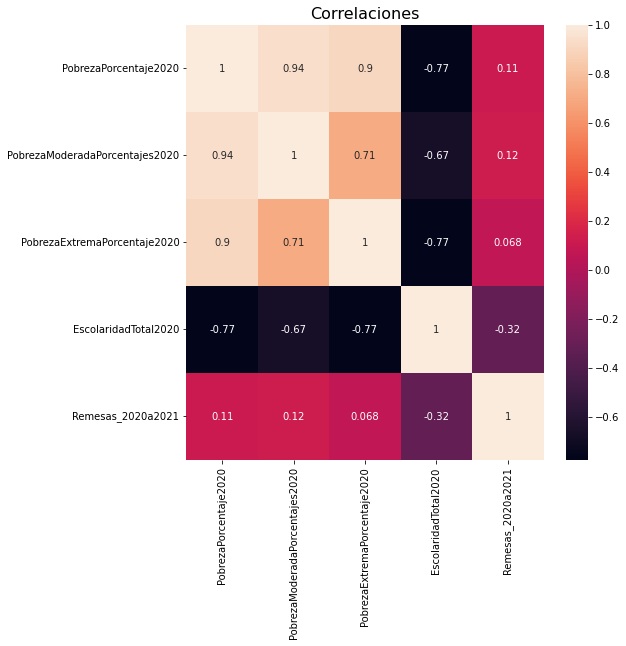

In [38]:
plt.figure(figsize=(8,8))

plt.title("Correlaciones", fontsize = 16)

sns.heatmap(data=df_joined.corr(), annot=True)

La correlación nos muestra que a mayor escolaridad menor pobreza, pero esto no aplica para las remesas, es decir, su relación no se puede definir de forma visual con alguna función conocida por mi. Por otro lado, estados con mayor pobreza tienen una mayor cantidad de remesas, pero la correlación no es alta. Para tener mejor idea de la relación obtuve un `pairplot` con lo que se identifica alguna relación.

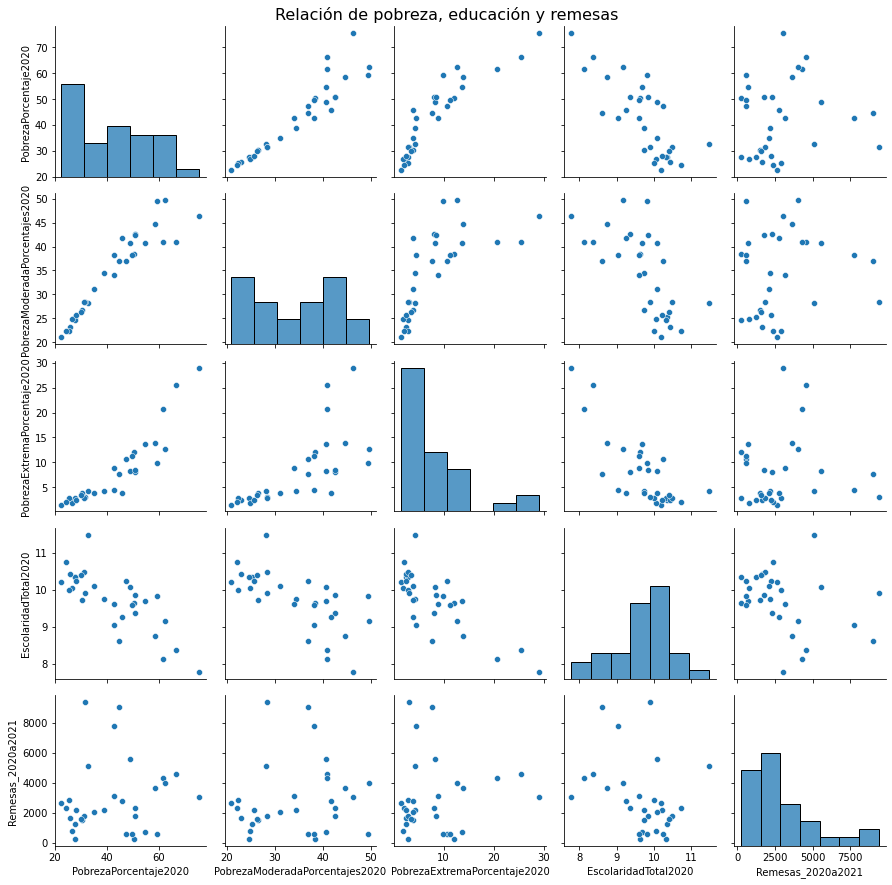

In [39]:
p = sns.pairplot(df_joined)

p.figure.suptitle("Relación de pobreza, educación y remesas", fontsize = 16)
p.fig.tight_layout()

Para encontrar alguna relación apliqué una normalización `Box-Cox` al conjunto de datos de las remesas de 2020-2021.

In [40]:
from scipy import stats

normalized_data = stats.boxcox(df_joined.Remesas_2020a2021)

In [41]:
normalized_data[0]

array([18.45838639, 22.88100351, 11.26826982, 11.51985849, 19.93349298,
       16.14331412, 23.8066184 , 23.42999181, 27.4268828 , 21.75415934,
       30.75983472, 26.63023865, 22.08297722, 32.34702421, 28.10226567,
       32.02239387, 20.43953021, 19.61464255, 22.13566529, 26.20560507,
       25.70691928, 20.60501663, 14.51651011, 24.04364876, 21.76078022,
       19.7857044 , 15.67585309, 21.39621459, 14.60569034, 25.04633706,
       14.74227629, 23.22458251])

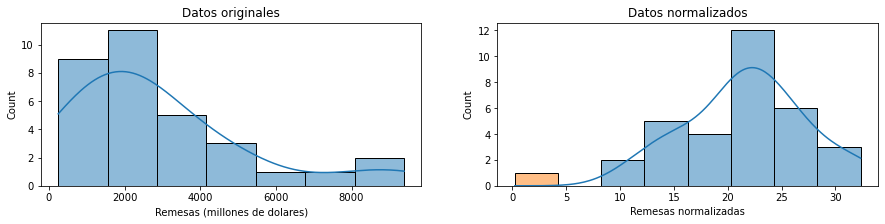

In [42]:
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(df_joined.Remesas_2020a2021, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Datos originales")
ax[0].set(xlabel="Remesas (millones de dolares)")

sns.histplot(normalized_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Datos normalizados")
ax[1].set(xlabel="Remesas normalizadas")
plt.show()

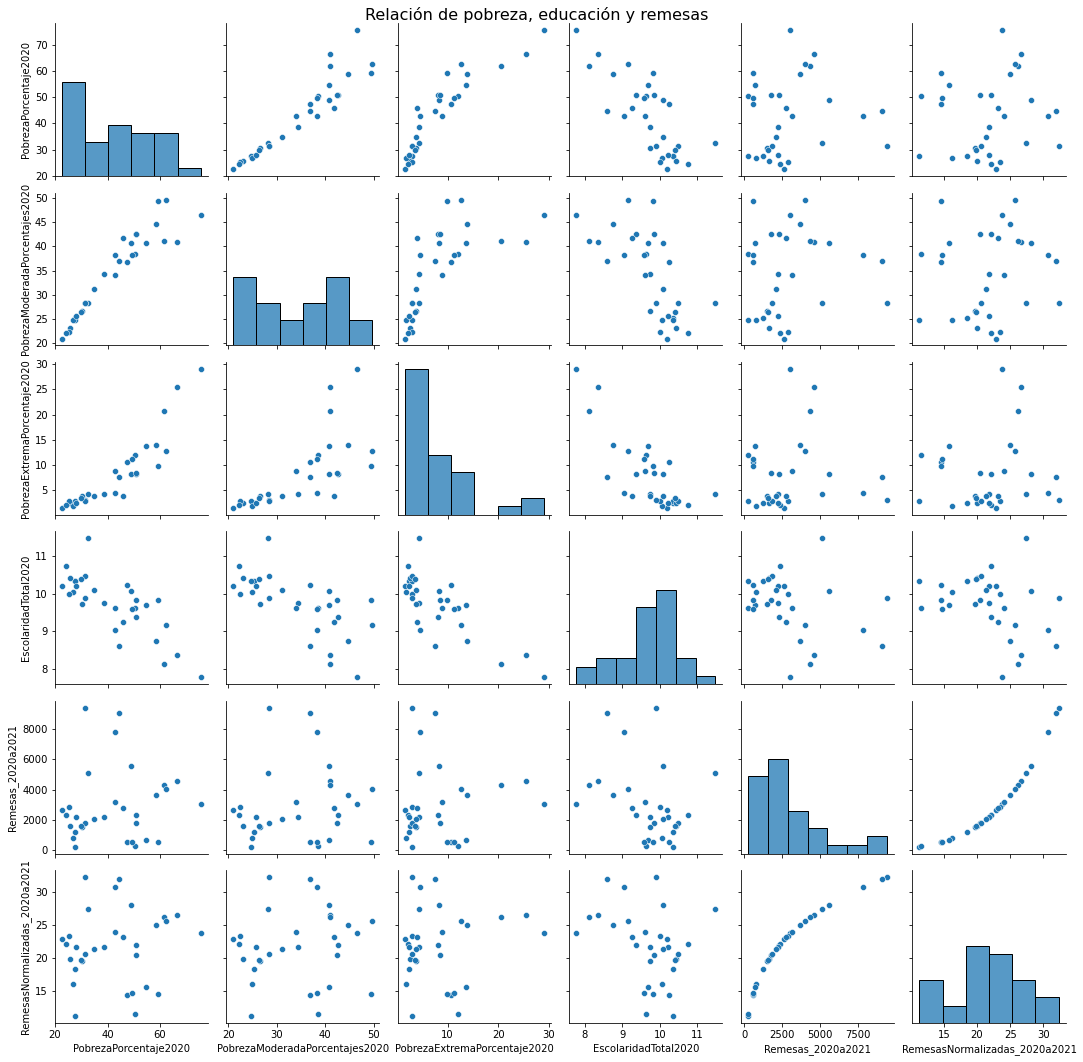

In [43]:
df_joined['RemesasNormalizadas_2020a2021'] = normalized_data[0]

p = sns.pairplot(df_joined)

p.figure.suptitle("Relación de pobreza, educación y remesas", fontsize = 16)
p.fig.tight_layout()

No se observa alguna relación entre las remesas contra la educación y la pobreza. Esto nos indica que un modelo lineal no serviría para, por ejemplo, pronosticar la reducción de la pobreza a partir de las remesas y la educación. Sin embargo, la variable de educación si tiene una relación clara en su influencia en la pobreza.

# Ingeniería de características

## Pruebas de independencia estadística
Surgió la duda de si las variables de pobreza, pobreza moderada y pobreza extrema son estadísticamente independientes. Para comprobarlo se aplicó una prueba $\chi^2$.

Del libro de Rice(2006). Se recupera la teoría de la prueba de independencia estadística traducida para mejor comprensión del lector.

<div class="alert alert-block alert-info">
    
La distribución conjunta de las cuentas $n_{ij}$, donde $i = 1, ... , I $ y $j = 1, ... , J$, es
multinomial con probabilidades en las celdas (de la tabla de contingencia) indicadas como $\pi_{ij}$. Sean

$$\pi_{i.} = \sum_{j = 1}^J{ \pi_{ij} } $$
$$\pi_{.j} = \sum_{i = 1}^I{ \pi_{ij} } $$

las probabilidades marginales de que una observación caiga en la $i$-ésima fila y $j$-ésima columna, respectivamente. Si las clasificaciones en las fila y columna son independientes entre sí, entonces:

$$ \pi_{ij} = \pi_{i.} \pi_{.j} $$

Por lo tanto, consideramos probar la siguiente hipótesis nula:

$$ H_0: \pi_{ij} = \pi_{i.} \pi_{.j}, $$
$$ i = 1, ... , I,         j = 1, ... , J$$

versus la alternativa de que los $ \pi_{ij} $ son libres. Bajo $H_0$, el estimador de máxima verosimilitud de $\pi_{ij}$ es simplemente

$$ \tilde{ \pi }_{ij} = \tilde{ \pi }_{i.} \times \tilde{ \pi_{.j} } $$
$$ = \frac { n_{i.} } { n } \times \frac { n_{.j} } { n }$$


... Bajo la (hipótesis) alternativa, el estimador de máxima verosimilitud de $\pi_{ij}$ es
simplemente

$$ \tilde{\pi}_{ij} = \frac { n_{ij} } { n } $$

Estas estimaciones se pueden usar para formar una prueba tasa de verosimilitud o una prueba asintótica equivalente chi-cuadrado de Pearson,

$$ \chi^2 = \sum_{i = 1}^I{ \sum_{j = 1}^J{ \frac { ( O_{ij} - E_{ij} )^2 } { E_{ij} } } } $$

Aquí los $ O_{ ij } $ son los conteos observados ($ n_{ ij } $). Los conteos esperados, los $ E_{ ij } $, son los conteos ajustados:

$$ E_{ ij } = n\hat{ \pi }_{ ij } = \frac { n_{i.}  n_{.j} } {n}  $$

El estadístico chi-cuadrado de Pearson es, por lo tanto,

$$ \chi^2 = \sum_{i = 1}^I{ \sum_{j = 1}^J{ \frac { ( n_{ ij } - \frac { n_{i.}  n_{.j} } {n} )^2 } { \frac { n_{i.}  n_{.j} } {n} } } } $$
</div>

Con esta definición se hizo la prueba de la tabla de contingencia con `scipy`.

In [44]:
import scipy.stats as stats

#perform the Chi-Square Test of Independence
alpha = 0.05
result = stats.chi2_contingency(df_joined[['PobrezaPorcentaje2020', 'PobrezaModeradaPorcentajes2020']])
chisquared = result[0]
pvalue = result[1]

print("Pr( X^2 <=", chisquared, ") = ", pvalue)

if (pvalue < alpha):
    print("Rechazamos H_0")
else:
    print("Rechazamos H_A")

Pr( X^2 <= 8.390978999483913 ) =  0.9999825961253751
Rechazamos H_A


Entonces ambas variables son estadísticamente independientes.

In [45]:
import scipy.stats as stats

#perform the Chi-Square Test of Independence
alpha = 0.05
result = stats.chi2_contingency(df_joined[['PobrezaPorcentaje2020', 'PobrezaExtremaPorcentaje2020']])
chisquared = result[0]
pvalue = result[1]

print("Pr( X^2 <=", chisquared, ") = ", pvalue)

if (pvalue < alpha):
    print("Rechazamos H_0")
else:
    print("Rechazamos H_A")


Pr( X^2 <= 49.984823890830484 ) =  0.016815984756552573
Rechazamos H_0


Entonces ambas variables son estadísticamente dependientes.

In [46]:
import scipy.stats as stats

#perform the Chi-Square Test of Independence
alpha = 0.05
result = stats.chi2_contingency(df_joined[['PobrezaModeradaPorcentajes2020', 'PobrezaExtremaPorcentaje2020']])
chisquared = result[0]
pvalue = result[1]

print("Pr( X^2 <=", chisquared, ") = ", pvalue)

if (pvalue < alpha):
    print("Rechazamos H_0")
else:
    print("Rechazamos H_A")

##df_joined.PobrezaExtremaPorcentaje2020

Pr( X^2 <= 77.00604136484802 ) =  8.685271652355142e-06
Rechazamos H_0


Entonces ambas variables son estadísticamente dependientes.

Sabiendo que 
1. `PobrezaPorcentaje2020` y `PobrezaModeradaPorcentajes2020` son variables aleatorias estadísticamente independientes.
2. `PobrezaPorcentaje2020` y `PobrezaExtremaPorcentaje2020` son variables aleatorias estadísticamente dependientes.
3. `PobrezaModeradaPorcentajes2020` y `PobrezaExtremaPorcentaje2020` son variables aleatorias estadísticamente dependientes.

De esta forma tenemos suficiente información para crear nuevas características.

## Nueva característica como tasa y una nueva variable aleatoria
Dado que `PobrezaPorcentaje2020` y `PobrezaModeradaPorcentajes2020` son variables independientes, aún sin saber la función de densidad de probabilidades, se obtuvo una nueva variable basado en el hecho de que la combinación lineal de variables aleatorias da por resultado una nueva variable aleatoria. Aquí no podriamos decir que las variables tienen la misma distribución de probabilidad, sin embargo, asumiremos esto para el experimento.

In [47]:
df_joined['TasaPobrezaRemesas'] = (df_joined.PobrezaPorcentaje2020 +
                                   df_joined.PobrezaModeradaPorcentajes2020) / df_joined.Remesas_2020a2021

Dado que esta variable contempla la agregación de la pobreza en relación a las remesas generaré una nueva variable que sea una variable aleatoria dada por la suma de las pobrezas.

In [48]:
df_joined['VAPobrezas'] = df_joined.PobrezaPorcentaje2020 + df_joined.PobrezaModeradaPorcentajes2020

La nueva variable tiene la siguiente distribución.

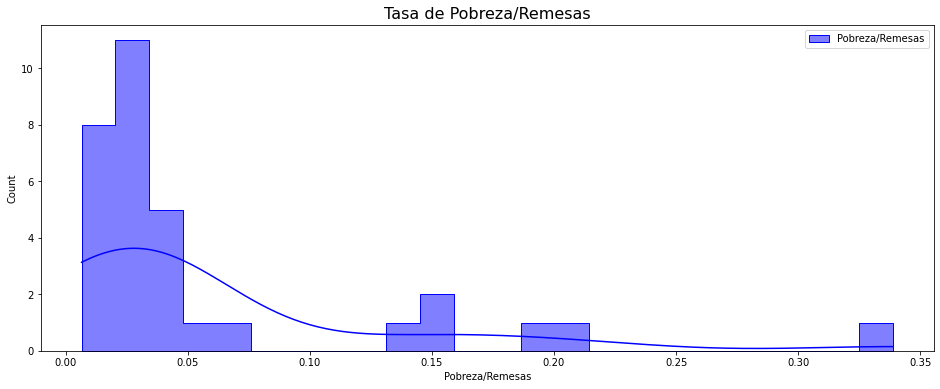

In [49]:
plt.figure(figsize=(16,6))

sns.histplot(data=df_joined 
            , x= 'TasaPobrezaRemesas', label="Pobreza/Remesas", kde=True
            , color = 'blue', element="step")

plt.title("Tasa de Pobreza/Remesas", fontsize = 16)
plt.xlabel("Pobreza/Remesas")

plt.legend()

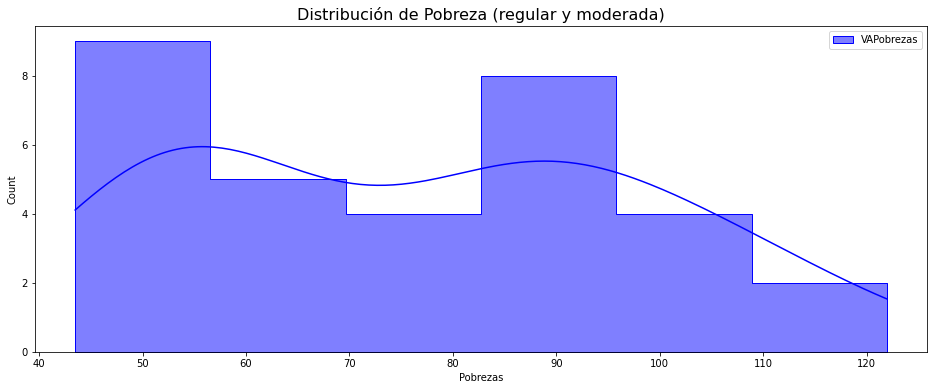

In [50]:
plt.figure(figsize=(16,6))

sns.histplot(data=df_joined 
            , x= 'VAPobrezas', label="VAPobrezas", kde=True
            , color = 'blue', element="step")

plt.title("Distribución de Pobreza (regular y moderada)", fontsize = 16)
plt.xlabel("Pobrezas")

plt.legend()

## Información mutua
Con las variables definidas, obtener la calificación de información mutua

In [51]:
X = df_joined.copy()
y = X.pop("TasaPobrezaRemesas")

In [52]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features = 'auto'):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)


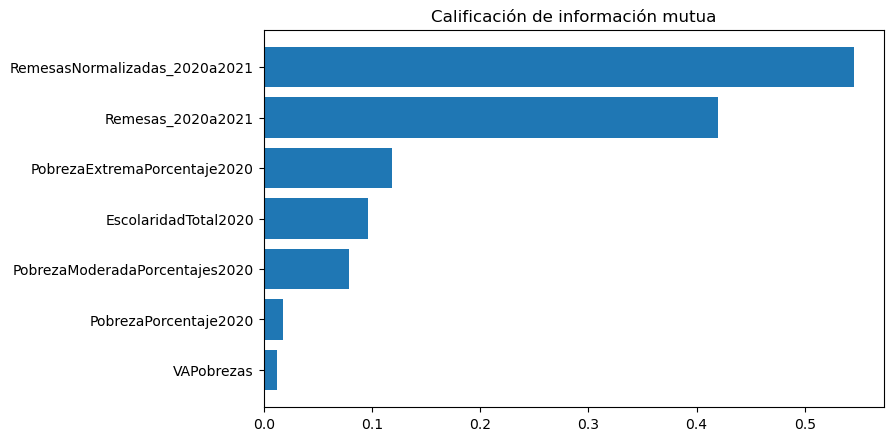

In [53]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Calificación de información mutua")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

En este caso, la información mutua asociada con las Remesas Normalizadas sería la variable predictora de la tasa de Pobreza contra Remesas con la mayor capacidad de predicción. Sin embargo su poder no está cercano al valor de 2. De hecho apenas está por encima del 0.5, lo que indica una baja dependencia.

## Clusterización por K-Means como nueva característica
En las sigguientes líneas de código encontrará una nueva característica basada en el nivel de impacto de las remesas en la mitigación de la pobreza. Es por esto que se buscó obtener 3 clusters. Identificar el impacto bajo, medio y alto de las remesas en la mitigación de la pobreza es el propósito de estas categorías.

In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,PobrezaPorcentaje2020,PobrezaModeradaPorcentajes2020,PobrezaExtremaPorcentaje2020,EscolaridadTotal2020,Remesas_2020a2021,RemesasNormalizadas_2020a2021,VAPobrezas,Cluster
Entidad federativa,,,,,,,,
Aguascalientes,27.626693,25.209799,2.416894,10.35,1236.5624,18.458386,52.836492,2
Baja California,22.510117,20.976987,1.533130,10.20,2633.2776,22.881004,43.487104,0
Baja California Sur,27.602224,24.706506,2.895718,10.34,245.3707,11.268270,52.308730,2
Campeche,50.549147,38.503966,12.045181,9.63,262.7207,11.519858,89.053113,2
Coahuila de Zaragoza,25.617041,23.062671,2.554371,10.43,1615.5677,19.933493,48.679712,2


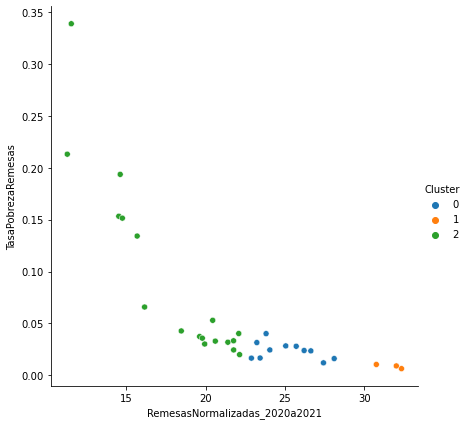

In [55]:
sns.relplot(
    x="RemesasNormalizadas_2020a2021", y=y, hue="Cluster", data=X, height=6,
);

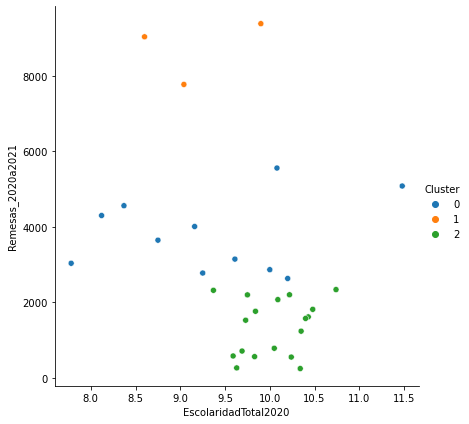

In [56]:
sns.relplot(
    x="EscolaridadTotal2020", y='Remesas_2020a2021', hue="Cluster", data=X, height=6,
);

El plot de relación de la nueva variable aleatoria de pobreza `VAPobrezas` y coloreadas por clusters conserva una separación que bien podría ser aprendida por algún modelo de árbol. Esto es evidente en la gráfica posterior.

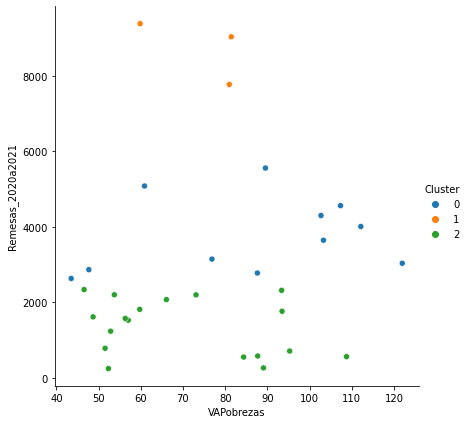

In [57]:
sns.relplot(
    x="VAPobrezas", y='Remesas_2020a2021', hue="Cluster", data=X, height=6,
);

Se puede observar que los clusters permiten identificar la participación de la escolaridad y las remesas a través de las tasas definidas.

# Implementación de modelos
Después de deliverar sobre la mejor manera de armar el modelo es evidente que la variable de `TasaPobrezaRemesas` no debería participar en el entrenamiento de la regresión para encontrar el nivel de remesas dado que participa como parte de la tasa. Es por esto que se decidió eliminar dicha variable y usar la `Remesas_2020a2021` como target del entrenamiento.

In [58]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics

X = df_joined.loc[:,df_joined.columns != "TasaPobrezaRemesas"].copy()
y = X.pop("Remesas_2020a2021")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Detalles de los algoritmos de entrenamiento de modelos
Para esta labor se escogió el siguiente grupo de algoritmos, de los cuales se dará una breve explicación.

* Algoritmo **LinearRegression** de `sklearn.linear_model`. Este algoritmo es la implementación de la regresión multivariada descrita por Hastie(2008).

$$ f(X) = \beta_0 + \sum_{j=1}^p {X_j\beta_j}$$

* Algoritmo **SVR** de `sklearn.svm`. Este algoritmo es la implementación del Support Vector Machine for Regression descrito por Hastie(2008).

$$ f(X) = \beta_0 + \sum_{m=1}^M {\beta_m h_m(x)} $$

donde $h_m(x)$ es el conjunto de funciones base que hacen de $ f(x) $  una función no lineal.

* Algoritmo **DecisionTreeRegressor** de `sklearn.tree`. Este algoritmo es la implementación del Classification and Auto Regressive Tree descrito por Hastie(2008).

$$ f(X) = \sum_{m=1}^M { c_m \mathbb{ I } (x \in R_m) } $$

donde $h_m(x)$ es el conjunto de funciones base que hacen de $ f(x) $  una función no lineal.

* Algoritmo **RandomForestRegressor** de `sklearn.ensemble`. Este algoritmo es la implementación del bagging de los árboles $ \{ T_b \}_1^B $ descrito por Hastie(2008). La predicción de nuevos puntos en $x$ en a regresión está dada por:

$$ \hat{ f }_{ rf }^B( x ) = \frac { 1 } { B } \sum_{ b=1 }^B { T_b(x) }  $$

* Algoritmo **KNeighborsRegressor** de `sklearn.neighbors`. Este algoritmo es la interpolación local de acuerdo con la documentación de **scikit-learn**.

* Algoritmo **MLPRegressor** de `sklearn.neural_network`. Este algoritmo es la implementación del Multi Layer Perceptron descrito por Alpaydin(2020).

* Algoritmo **XGBRegressor** de `xgboost`. De acuerdo con la documentación en One-Off Coder(2019), la descripción del algoritmo es la siguiente
    
> Las implementaciones de XGBoost están paralelizadas y aprovechan la computación GPU. Algunos de los tipos de learners que tiene XGBoost incluyen boosting de gradiente para regresión, clasificación y análisis de supervivencia.

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

C:\Users\ismedina\Anaconda3\envs\MCDI2022_01_Modelos\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


De los algoritmos presentados se hizo la ejecución del entrenamiento de modelos usando K-Folds para medir la variabilidad que cada modelo tendrá derivado del conjunto de datos usados para ese propósito. Para esto usaremos 10 folds y capturaremos el coeficiente de determinación $R^2$.

In [60]:
# to feed the random state
seed = 5

# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('SVR', SVR(kernel='rbf', gamma='auto')))
models.append(('CART', DecisionTreeRegressor(random_state = seed)))
models.append(('RFR', RandomForestRegressor(n_estimators = 300, random_state = seed)))
models.append(('KNNR', KNeighborsRegressor(n_neighbors=2)))
models.append(('MLPR', MLPRegressor(random_state=seed, max_iter=10000)))
models.append(('XGBR', XGBRegressor(n_estimators=1000, max_depth=7, subsample=0.7, colsample_bytree=0.8)))

# evaluate each model in turn
results = []
names = []

## Ismael Medina. Tomamos el accurary dado que nos interesa tener el mayor índice 
##   de determinación R^2
scoring = 'r2'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed, shuffle = True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LR: -0.025767 (1.091268)
SVR: -1.417167 (2.943075)
CART: 0.779556 (0.206864)
RFR: 0.821483 (0.179879)
KNNR: -5.435888 (10.513535)


C:\Users\ismedina\Anaconda3\envs\MCDI2022_01_Modelos\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ismedina\Anaconda3\envs\MCDI2022_01_Modelos\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ismedina\Anaconda3\envs\MCDI2022_01_Modelos\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ismedina\Anaconda3\envs\MCDI2022_01_Modelos\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the opti

MLPR: 0.477363 (0.762273)


C:\Users\ismedina\Anaconda3\envs\MCDI2022_01_Modelos\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\ismedina\Anaconda3\envs\MCDI2022_01_Modelos\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\ismedina\Anaconda3\envs\MCDI2022_01_Modelos\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\ismedina\Anaconda3\envs\MCDI2022_01_Modelos\lib\site-packages

XGBR: 0.417197 (0.672183)


Es posible entonces graficar el desempeño dado por el codeficiente de determinación de los modelos y sus variabilidad dados los K-Folds con plots de caja-bigote.

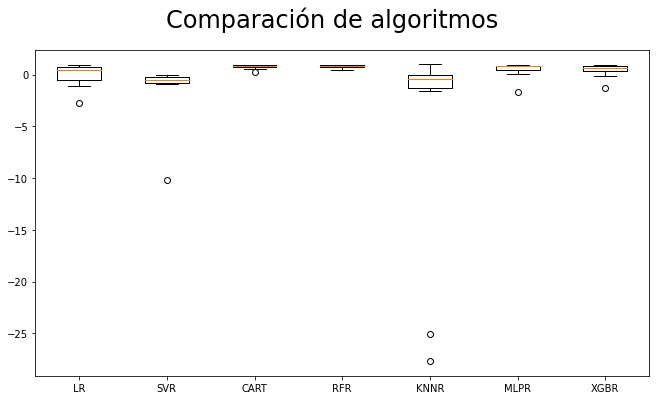

In [61]:
%matplotlib inline
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Comparación de algoritmos', fontsize = 24)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Es notorio que hay algoritmos que generaron modelos cuyo coeficiente es muy bajo y / o que tienen mucha variabilidad. El modelo que tuvo un mejor coeficiente con una variabilidad que asumo aceptar es el modelo **Random Forest**. Este modelo se entrenará de forma separada.

# El modelo final
Sabiendo que el Classification and Auto Regressive Tree tiene un desempeño aceptable para predecir el las remesas dado el nivel de pobreza de la región y el porcentaje de la población que tiene educación universitaria.

El conjunto de entrenamiento y validación tendrá una proporción 80/20.

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = seed)

In [67]:
model = RandomForestRegressor(n_estimators = 300, random_state = seed)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)

0.9330372114448059


La media del coeficiente de determinación $R^2$ es alto para este conjunto de entrenamiento (82.14%). Sin embargo se sabe que la desviación estándar es tan alta como 17.98%. Con el modelo entrenado se hizo el pronóstico de los valores en el conjunto de pruebas.

In [68]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'Remesas')

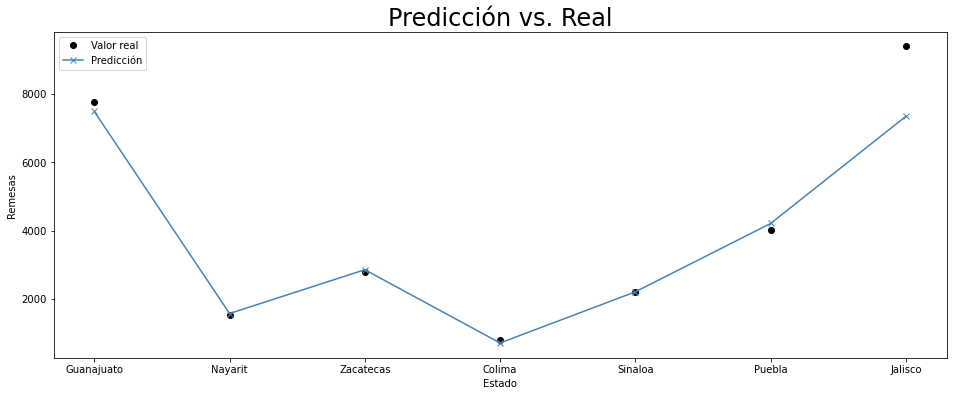

In [74]:
plt.figure(figsize=(16,6))

plt.plot(X_test.index, y_test, marker='o', color='black', linewidth=0, label = 'Valor real')
plt.plot(X_test.index, y_pred, marker='x', color='steelblue', label = 'Predicción')

plt.title("Predicción vs. Real", fontsize = 24)
plt.legend()
plt.xlabel("Estado")
plt.ylabel("Remesas")


# Conclusión
El modelo hace regresiones con un coeficiente de determinación que hace al modelo adecuado para el pronóstico. Sin duda el modelo no pudo ser definido mediante algoritmos de modelos paramétricos.
Los datos nos dicen que existe una correlación donde la población con mayor tasa de personas con nivel universitario tiende a reportar niveles de pobreza más bajos y que las remesas no tienen una correlación directa en la reducción de pobreza. Así pues, se sabe que las remesas en realidad no son un factor que en este momento se sepa que existe junto con la reducción de la pobreza.

# Conjuntos de datos

https://www.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?sector=1&accion=consultarCuadro&idCuadro=CE168&locale=es
https://www.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?sector=1&accion=consultarCuadro&idCuadro=CE167&locale=es
https://www.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?sector=1&accion=consultarCuadro&idCuadro=CE166&locale=es
https://www.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?sector=1&accion=consultarDirectorioCuadros&locale=es
https://www.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?sector=1&accion=consultarCuadro&idCuadro=CE81&locale=es
https://www.inegi.org.mx/app/tabulados/interactivos/?pxq=9171df60-8e9e-4417-932e-9b80593216ee&idrt=15&opc=t
https://www.inegi.org.mx/app/tabulados/interactivos/?pxq=61a38ddd-3328-42e5-bd57-a3e18ab3cc62&idrt=15&opc=t
https://www.inegi.org.mx/app/tabulados/interactivos/?pxq=Educacion_Educacion_05_2f6d2a08-babc-442f-b4e0-25f7d324dfe0&idrt=15&opc=t
https://www.coneval.org.mx/Medicion/MP/Paginas/Pobreza_2020.aspx \
http://ippi.puebla.gob.mx/es/manos-ancestrales/etnias/mixtecos-2#:~:text=De%20los%20municipios%20poblanos%20con%20hablantes%20del%20mixteco,variantes%20ling%C3%BC%C3%ADsticas%20pertenecientes%20a%20la%20familia%20ling%C3%BC%C3%ADstica%20oto-mangue%3A



# Referencias

* Rice, J. A. (2007). The Analysis of Categorical Data. En J. A. Rice, *Mathematical Statistics and Data Analysis, Third Edition*. (págs. 520-523). Berkeley, California: Thomson / Brooks / Cole.
* Alpaydın, E. (2014). Multilayer Perceptrons. En E. Alpaydın, *Introduction To Machine Learning, Third Edition* (págs. 267-316). Massachusetts: Massachusetts Institute of Technology.
* Hastie, T. T. (2008). *The Elements of Statistical Learning. Data Mining, Inference, and Prediction. Second Edition*. Stanford: Springer.
* One-Off Coder. (31 de Marzo de 2022). *6. XGBoost*. Obtenido de Scikit, No Tears: https://learn-scikit.oneoffcoder.com/xgboost.html.